# Regularization: It is a method used to solve the problem of overfitting
    There are 3 types of this method:
        1.L1
        2.L2(mostly used)
        3.L1+L2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [2]:
x,y=make_moons(100,noise=0.25,random_state=2)

In [3]:
import pandas as pd

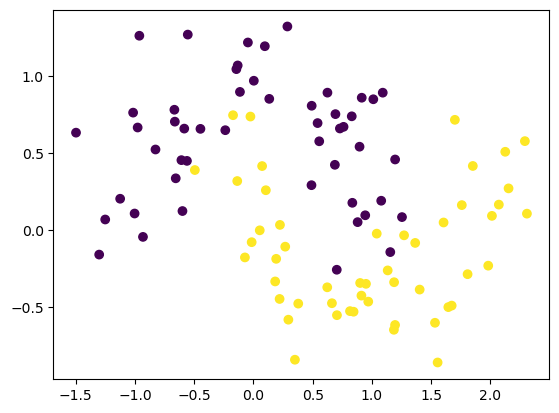

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

# Without regularization`

In [5]:
model=Sequential()

In [6]:
model.add(Dense(128,input_dim=2,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [7]:
model.summary()  # summary of our architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
adam=Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])
history=model.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 2s 185us/step


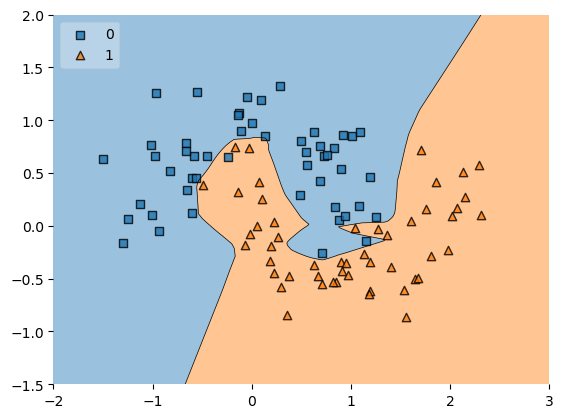

In [9]:
# here we can easily see the case of overfitting as or model is trying to go through each and every point of our traning data
plot_decision_regions(x, y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

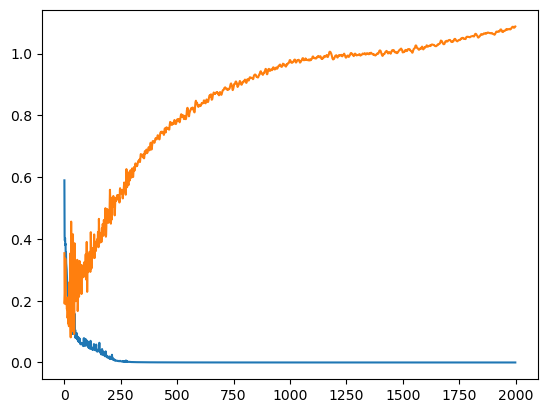

In [10]:
# another visualization of overfitting of our data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# With regularization

In [11]:
model1=Sequential()
model1.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1,activation="sigmoid"))

In [12]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
adam=Adam(learning_rate=0.01)
model1.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])
history=model1.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 2s 181us/step


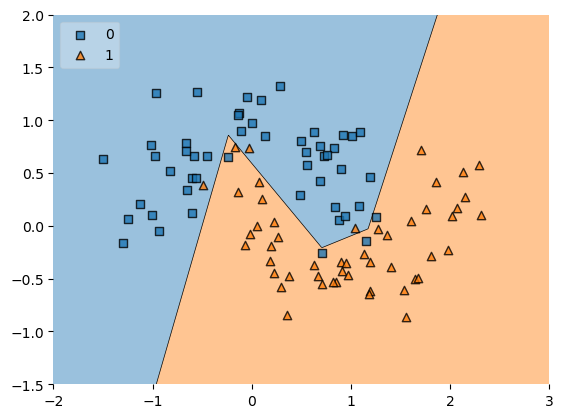

In [14]:
# here we can see this is much clear decesion boundry after regularization
plot_decision_regions(x, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

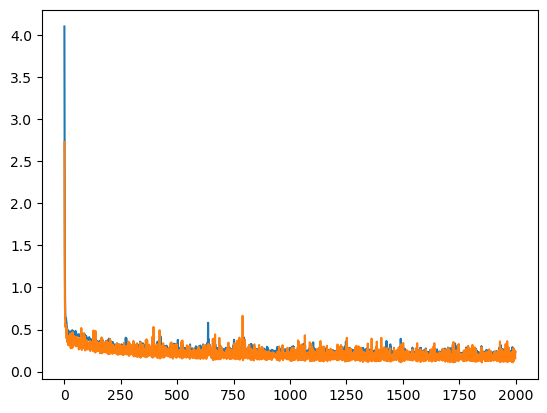

In [15]:
# another visualization of our data after regularization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
weights_without_regularization=model.get_weights()[0].reshape(256) # these are all the values of weights we got in our first layer without regularization
weights_with_regularization=model1.get_weights()[0].reshape(256) # these are all the values of weights we got in our first layer with regularization

In [17]:
weights_with_regularization

array([ 5.38695541e-36,  9.71363334e-05,  2.68758445e-36, -1.27884647e-27,
        1.35931185e-35, -1.51775879e-35,  6.00405474e-06, -1.01600809e-35,
        1.22692338e-35,  3.76742567e-37,  2.04858561e-35, -2.23762926e-37,
        9.72229394e-36, -7.26981841e-36,  1.10492796e-35, -7.14512449e-09,
        3.47365181e-36, -1.38097025e-35, -2.02150769e-36, -1.50748584e-35,
        1.69141698e-35,  1.29062823e-35, -1.38790239e-35,  1.20581011e-35,
       -4.31107387e-36, -3.70154002e-31, -1.19639611e-35, -2.77826931e-36,
       -1.56454610e-36,  5.61875968e-36,  7.43849797e-36,  2.31143645e-06,
       -7.00748171e-36, -2.43561152e-36, -1.11397727e-35,  9.61302621e-36,
       -3.94754559e-01, -4.00547404e-36,  4.86303032e-36,  1.54944189e-35,
       -3.71259450e-36, -1.55450633e-35, -8.27224877e-36,  8.22656635e-36,
        1.32766577e-36,  7.97322378e-36,  4.99602785e-36, -1.41502012e-35,
        1.60598960e-35,  4.03539735e-36,  1.74613430e-35, -1.05531555e-35,
        2.80740860e-23,  

In [18]:
weights_without_regularization

array([-3.63510370e-01,  2.29144499e-01, -2.79427953e-02, -1.64030418e-01,
       -1.13558643e-01,  6.35600612e-02, -4.05005217e-01,  1.20491996e-01,
       -5.06348193e-01,  1.35185868e-01,  2.80704886e-01,  7.76517391e-02,
        2.59951174e-01,  1.64175188e-04,  2.01790377e-01,  2.02118918e-01,
       -1.25981150e-02, -4.19496477e-01, -4.50236201e-01,  8.31610113e-02,
        2.14391440e-01, -3.70524019e-01,  3.00101221e-01,  2.02961877e-01,
       -4.09886532e-04,  6.55318052e-02,  1.61226407e-01, -4.91746282e-03,
       -1.50074020e-01,  3.04170176e-02,  1.71805546e-01,  9.79586132e-03,
        2.38238588e-01,  4.39142734e-02,  1.04122877e-01,  1.88667074e-01,
       -1.75169021e-01, -6.01874739e-02, -2.80856222e-01,  1.24110557e-01,
       -4.69096512e-01,  2.47219443e-01,  4.31348324e-01,  2.23005548e-01,
       -3.43749195e-01,  1.98343098e-02, -4.05930132e-01, -1.52249590e-01,
       -4.49864596e-01,  1.41502440e-01, -2.35092103e-01, -6.68315589e-02,
        9.04134139e-02, -

<Axes: >

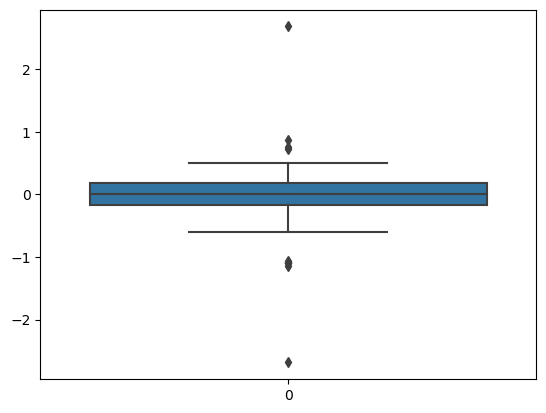

In [19]:
sns.boxplot(weights_without_regularization)

<Axes: >

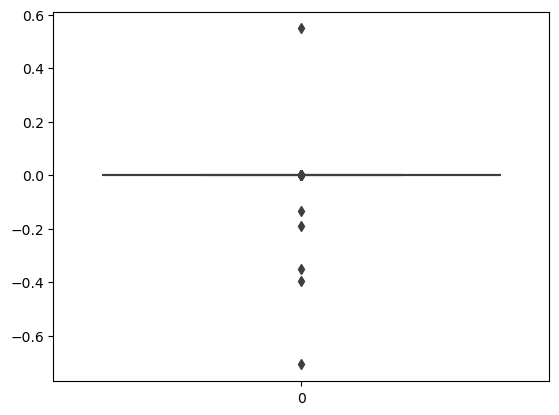

In [20]:
sns.boxplot(weights_with_regularization,)

In [22]:
# From above boxplot we can easily see that our weights has been shrinked which is wat regularization does

In [24]:
print("minimum value is",weights_without_regularization.min())
print("max value is",weights_without_regularization.max())

minimum value is -2.6853516
max value is 2.6823475


In [25]:
print("minimum value is",weights_with_regularization.min())
print("max value is",weights_with_regularization.max())

minimum value is -0.70784986
max value is 0.54954183
